In [1]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA 
data =[100, 105, 102, 107, 110, 112, 115, 117] 
s = pd.Series(data); s 

0    100
1    105
2    102
3    107
4    110
5    112
6    115
7    117
dtype: int64

In [2]:
model=ARIMA(data,order=(1,0,1))
fit=model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -21.936
Date:                Tue, 14 Oct 2025   AIC                             51.872
Time:                        18:13:08   BIC                             52.190
Sample:                             0   HQIC                            49.729
                                  - 8                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4705      8.462     12.818      0.000      91.885     125.056
ar.L1          0.8677      0.384      2.257      0.024       0.114       1.621
ma.L1          0.0320      0.611      0.052      0.9

In [3]:
forecast=fit.forecast(3)
print('Next 3 predictions: ', forecast.tolist()) 

Next 3 predictions:  [115.95972002275937, 114.96893992262511, 114.10923488999146]


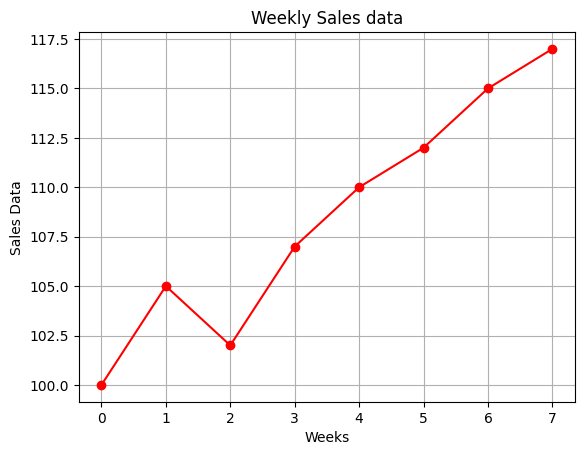

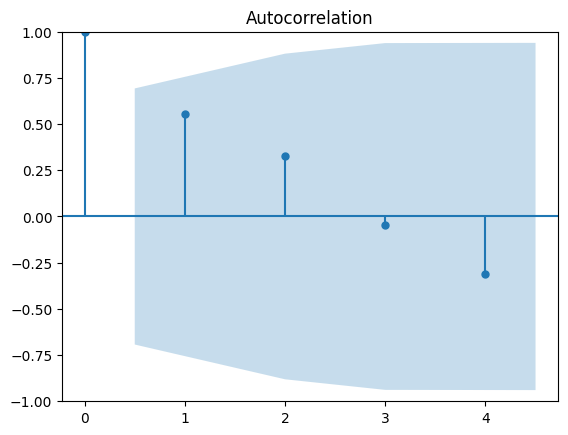

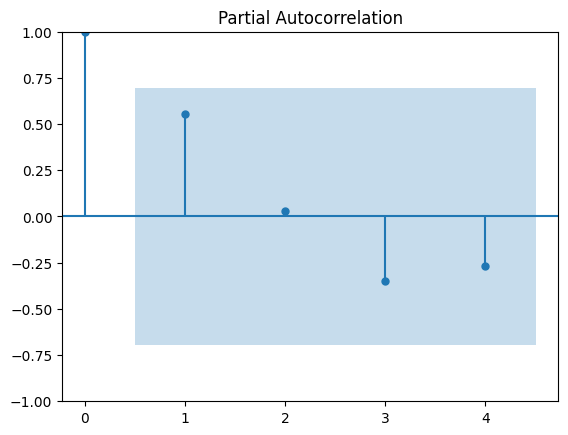

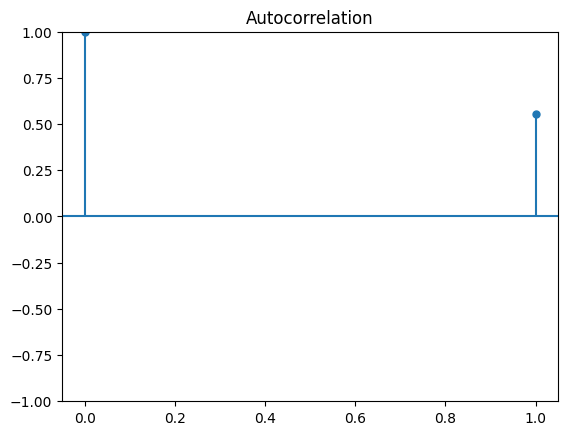

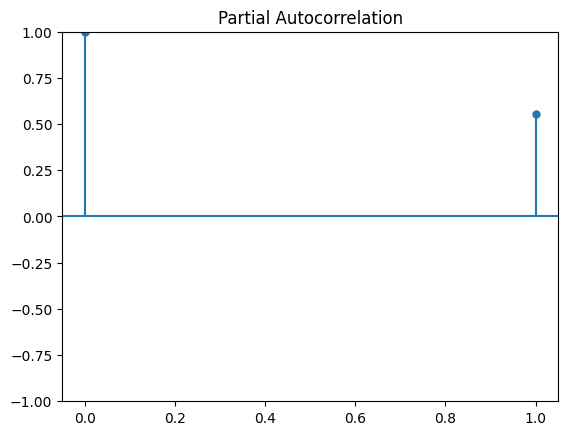

In [55]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

s.plot(title="Weekly Sales data",marker='o',color='red')
plt.xlabel("Weeks")
plt.ylabel("Sales Data")
plt.grid(True)
plt.show()

plot_acf(s,lags=4)
plt.show()
plot_pacf(s,lags=4)
plt.show()

plot_acf(s, lags=1) 
plt.show() 
plot_pacf(s, lags=1) 
plt.show() 


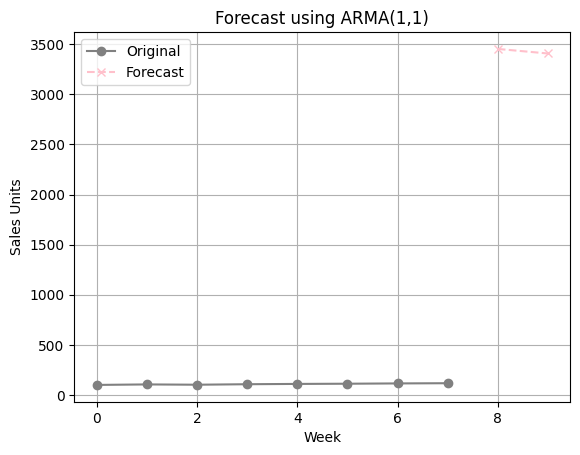

In [66]:
plt.plot(s, label='Original', marker='o', color='gray') 
forecast_index = range(len(s), len(s)+len(forecast)  # must match the number of forecast points you want
) 
plt.plot(forecast_index, forecast, label='Forecast', marker='x', color='pink', linestyle='--') 
plt.title('Forecast using ARMA(1,1)') 
plt.xlabel('Week') 
plt.ylabel('Sales Units') 
plt.legend() 
plt.grid() 
plt.show() 

In [ ]:
#calculate and plot autocovariance manually 
def autocovariance(x, lag): 
x_mean = np.mean(x) 
n = len(x) 
return np.sum((x[:n-lag]-x_mean)*(x[lag:]-x_mean))/(n-lag) 
#print covariance for lag 1 to 5 
for lag in range(1,6): 
cov = autocovariance(df['Temperature'].values, lag) 
print(f'Autocovariance for lag {lag}: {cov:.4f}') 

            Consumption
Date                   
2022-01-01          320
2022-01-02          315
2022-01-03          325
2022-01-04          330
2022-01-05          328


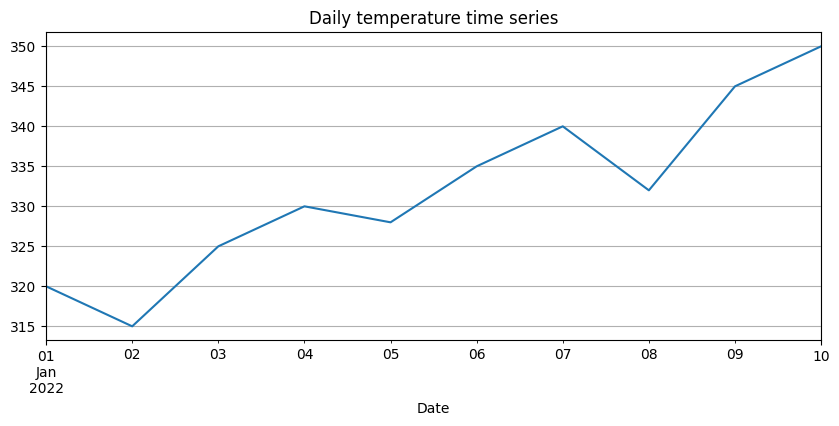

[118.66666667  65.66666667  23.55555556  26.44444444  -6.33333333
 -30.         -24.77777778 -38.55555556 -51.33333333 -24.        ]


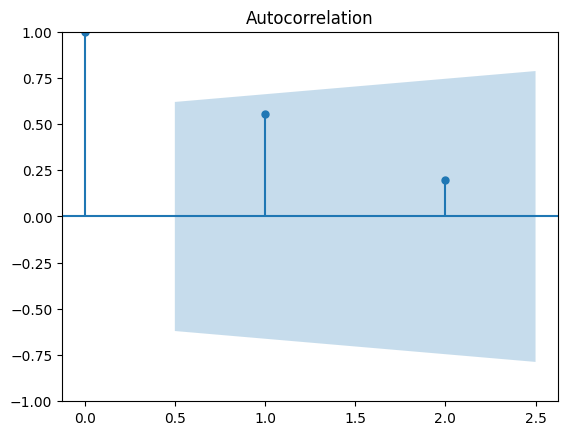

C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                   10
Model:                     AutoReg(2)   Log Likelihood                 -24.524
Method:               Conditional MLE   S.D. of innovations              5.189
Date:                Tue, 14 Oct 2025   AIC                             57.048
Time:                        18:55:06   BIC                             57.365
Sample:                    01-03-2022   HQIC                            54.904
                         - 01-10-2022                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             57.5642     83.699      0.688      0.492    -106.482     221.611
Consumption.L1     0.4870      0.277      1.757      0.079      -0.056       1.030
Consumption.L2     0.3558      0.317

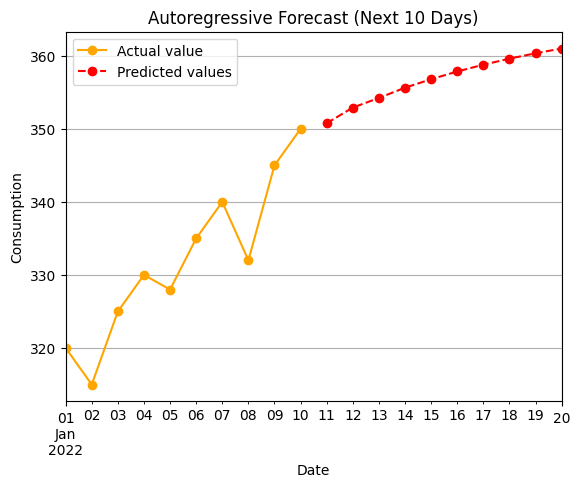

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from statsmodels.tsa.ar_model import AutoReg 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf 

data1=pd.read_csv('consumption_data.csv',parse_dates=['Date'],index_col='Date')
print(data1.head())
data1['Consumption'].plot(title='Daily temperature time series', figsize=(10,4))
plt.grid(True)
plt.show()

series1=data1['Consumption']
autocov = acf(series1, nlags=20, fft=False, missing='drop') * series1.var()
print(autocov)

plot_acf(series1,lags=2)
plt.show()

model=AutoReg(series1,lags=2)
fit=model.fit()
print(fit.summary())

forecast=fit.predict(start=len(series1),end=len(series1)+9,dynamic=False)
print("The predictions:",forecast.tolist())

series1.plot(label='Actual value',color='orange',marker='o')
forecast.plot(label="Predicted values",color='red',linestyle='--',marker='o')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title("Autoregressive Forecast (Next 10 Days)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Deepa\AppData\Local\Temp\ipykernel_24980\1179511072.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  years = pd.date_range(start='2014', periods=10, freq='Y')


Sales Data:
 2014-12-31     600
2015-12-31     900
2016-12-31    1100
2017-12-31    1300
2018-12-31    1600
2019-12-31    1850
2020-12-31    2200
2021-12-31    2600
2022-12-31    3000
2023-12-31    3500
Freq: YE-DEC, dtype: int64


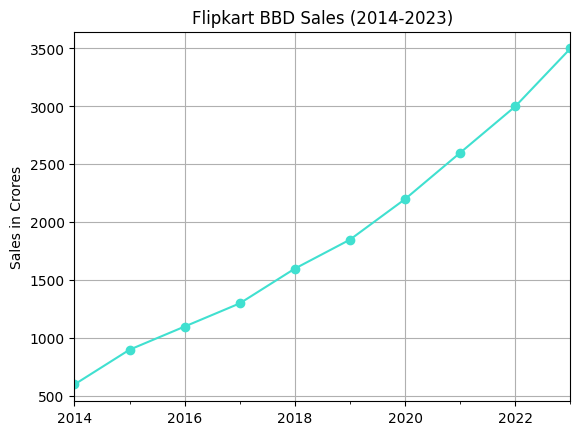

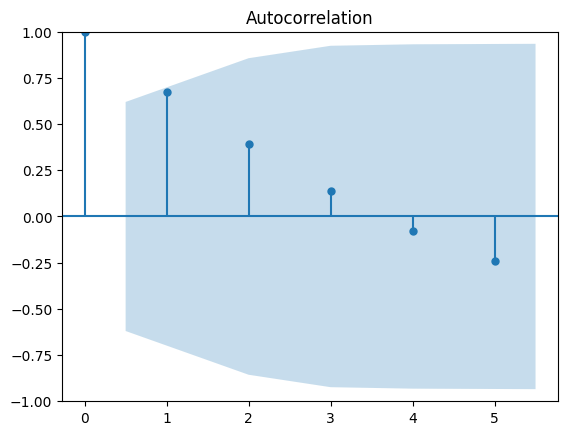

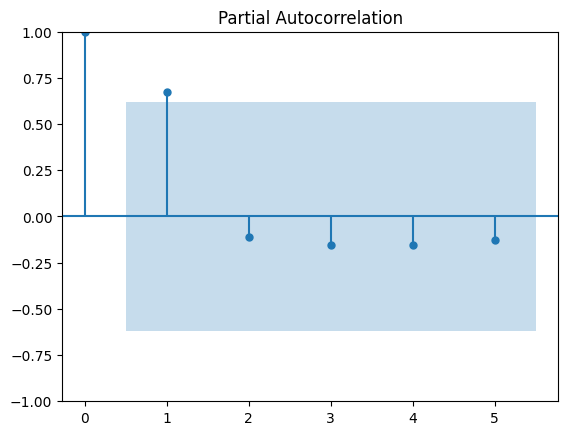

C:\Users\Deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -73.709
Date:                Tue, 14 Oct 2025   AIC                            153.419
Time:                        19:04:40   BIC                            154.326
Sample:                    12-31-2014   HQIC                           152.423
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2024.0227   1437.302      1.408      0.159    -793.037    4841.082
ar.L1          0.9681      0.381      2.540      0.011       0.221       1.715
sigma2      1.121e+05   2.79e+05      0.402      0.6

C:\Users\Deepa\AppData\Local\Temp\ipykernel_24980\1179511072.py:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start='2023', periods=2, freq='Y')


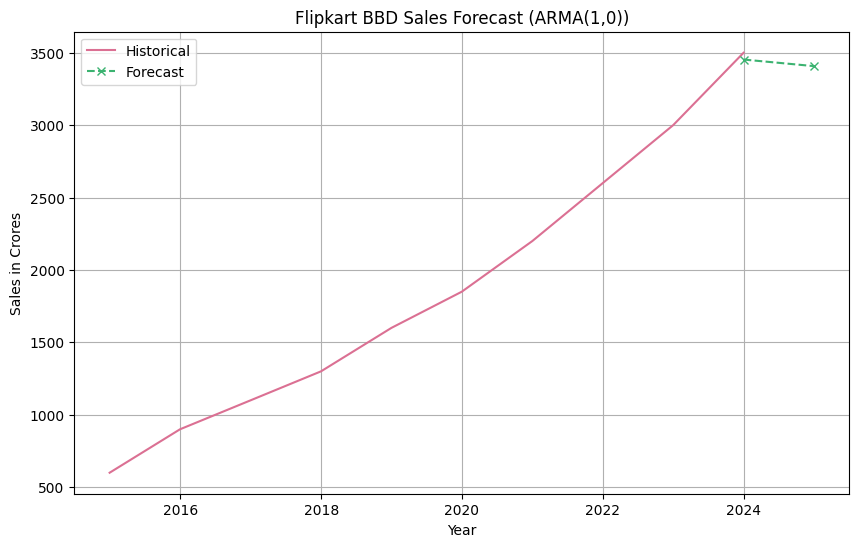

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
years = pd.date_range(start='2014', periods=10, freq='Y') 
sales = [600, 900, 1100, 1300, 1600, 1850, 2200, 2600, 3000, 3500] 
sales_series = pd.Series(sales, index=years) 
print('Sales Data:\n', sales_series)
sales_series.plot(marker='o', title='Flipkart BBD Sales (2014-2023)', ylabel ='Sales in Crores', 
color='Turquoise') 
plt.grid() 
plt.show() 
# acf and pacf to justify AR 
plot_acf(sales_series) 
plot_pacf(sales_series) 
plt.show()
#fit ARMA(1,0) (ARIMA with d=0, MA=0) 
model = ARIMA(sales_series, order=(1,0,0)) 
result = model.fit() 
#model summary 
print(result.summary()) 
forecast = result.forecast(steps=2) 
forecast_years = pd.date_range(start='2023', periods=2, freq='Y')
print('Forecast for next 2 years:\n',forecast,'\n') 
plt.figure(figsize=(10,6))
plt.plot(sales_series,label='Historical', color='palevioletred') 
plt.plot(forecast_years, forecast, label='Forecast', marker='x', linestyle='--', 
color='mediumseagreen') 
plt.legend() 
plt.title('Flipkart BBD Sales Forecast (ARMA(1,0))') 
plt.xlabel('Year') 
plt.ylabel('Sales in Crores') 
plt.grid() 
plt.show() 